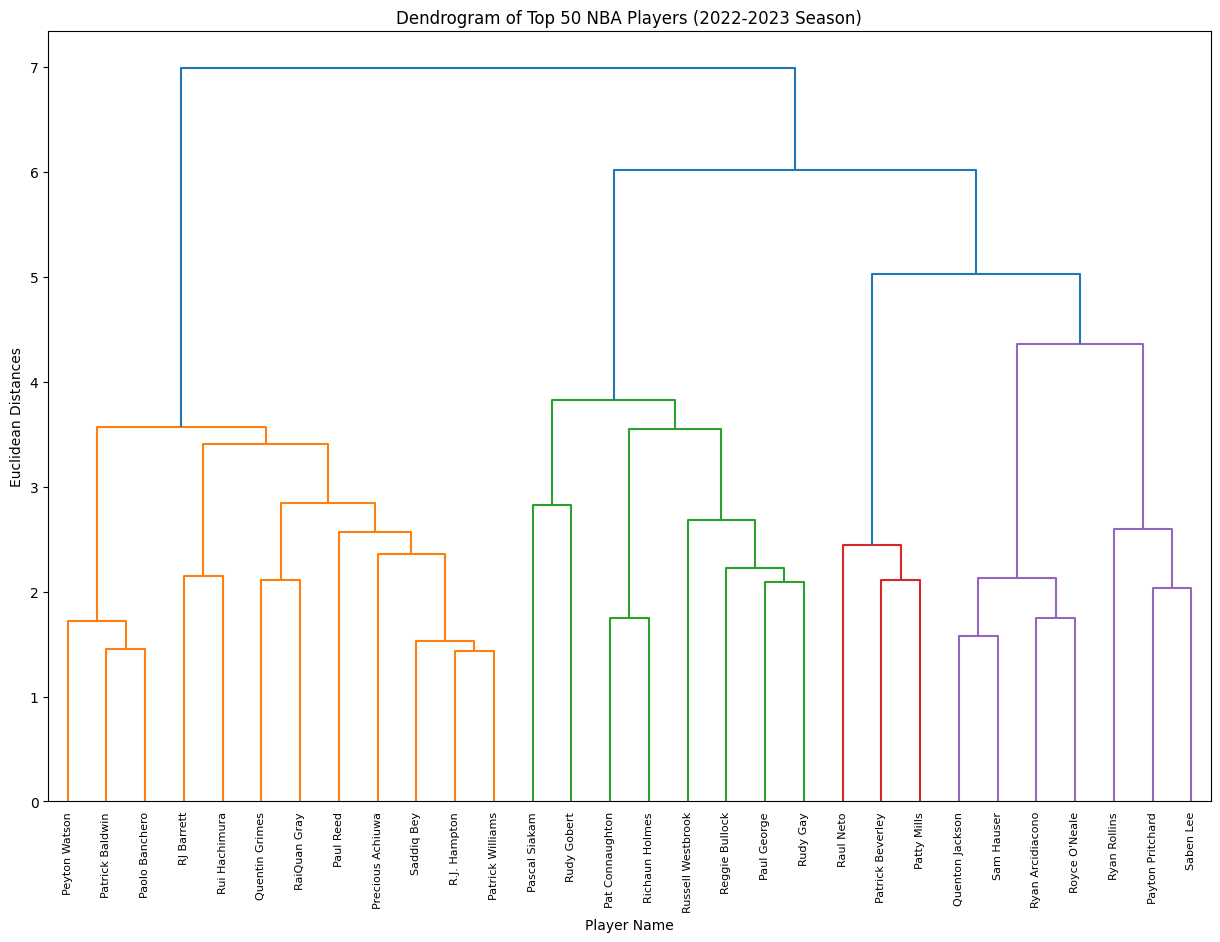

In [12]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load the provided CSV file
file_path = 'all_seasons.csv'
data = pd.read_csv(file_path)

# Filtering the data for the 2022-2023 season and selecting specified columns
season_2022_2023 = data[data['season'] == '2022-23']
selected_columns = ['player_name', 'player_height', 'age', 'country', 'college', 'draft_year', 'draft_round']
season_2022_2023_selected = season_2022_2023[selected_columns]

# Selecting the first 50 rows from the filtered dataset
season_2022_2023_top_50 = season_2022_2023_selected.head(30)

# One-hot encoding the categorical data
one_hot_encoded_top_50 = pd.get_dummies(season_2022_2023_top_50, columns=['country', 'college', 'draft_year', 'draft_round'])

# Normalizing the numerical data (player_height and age)
numerical_data_top_50 = one_hot_encoded_top_50[['player_height', 'age']]
normalized_data_top_50 = (numerical_data_top_50 - numerical_data_top_50.mean()) / numerical_data_top_50.std()

# Combining normalized numerical data and one-hot encoded categorical data
processed_data_top_50 = pd.concat([normalized_data_top_50, one_hot_encoded_top_50.drop(['player_height', 'age'], axis=1)], axis=1)

# Removing 'player_name' from the processed data
processed_data_top_50_without_names = processed_data_top_50.drop(columns=['player_name'])

# Performing hierarchical clustering on the top 50 rows
linked_top_50_without_names = linkage(processed_data_top_50_without_names, method='ward')

# Plotting the dendrogram for the top 50 players
plt.figure(figsize=(15, 10))
dendrogram(linked_top_50_without_names, labels=season_2022_2023_top_50['player_name'].values, leaf_rotation=90, leaf_font_size=8)
plt.title("Dendrogram of Top 50 NBA Players (2022-2023 Season)")
plt.xlabel("Player Name")
plt.ylabel("Euclidean Distances")
plt.show()


C:\Users\Adri\AppData\Local\Temp\ipykernel_13840\3185162409.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)
C:\Users\Adri\AppData\Local\Temp\ipykernel_13840\3185162409.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)
C:\Users\Adri\AppData\Local\Temp\ipykernel_13840\3185162409.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)


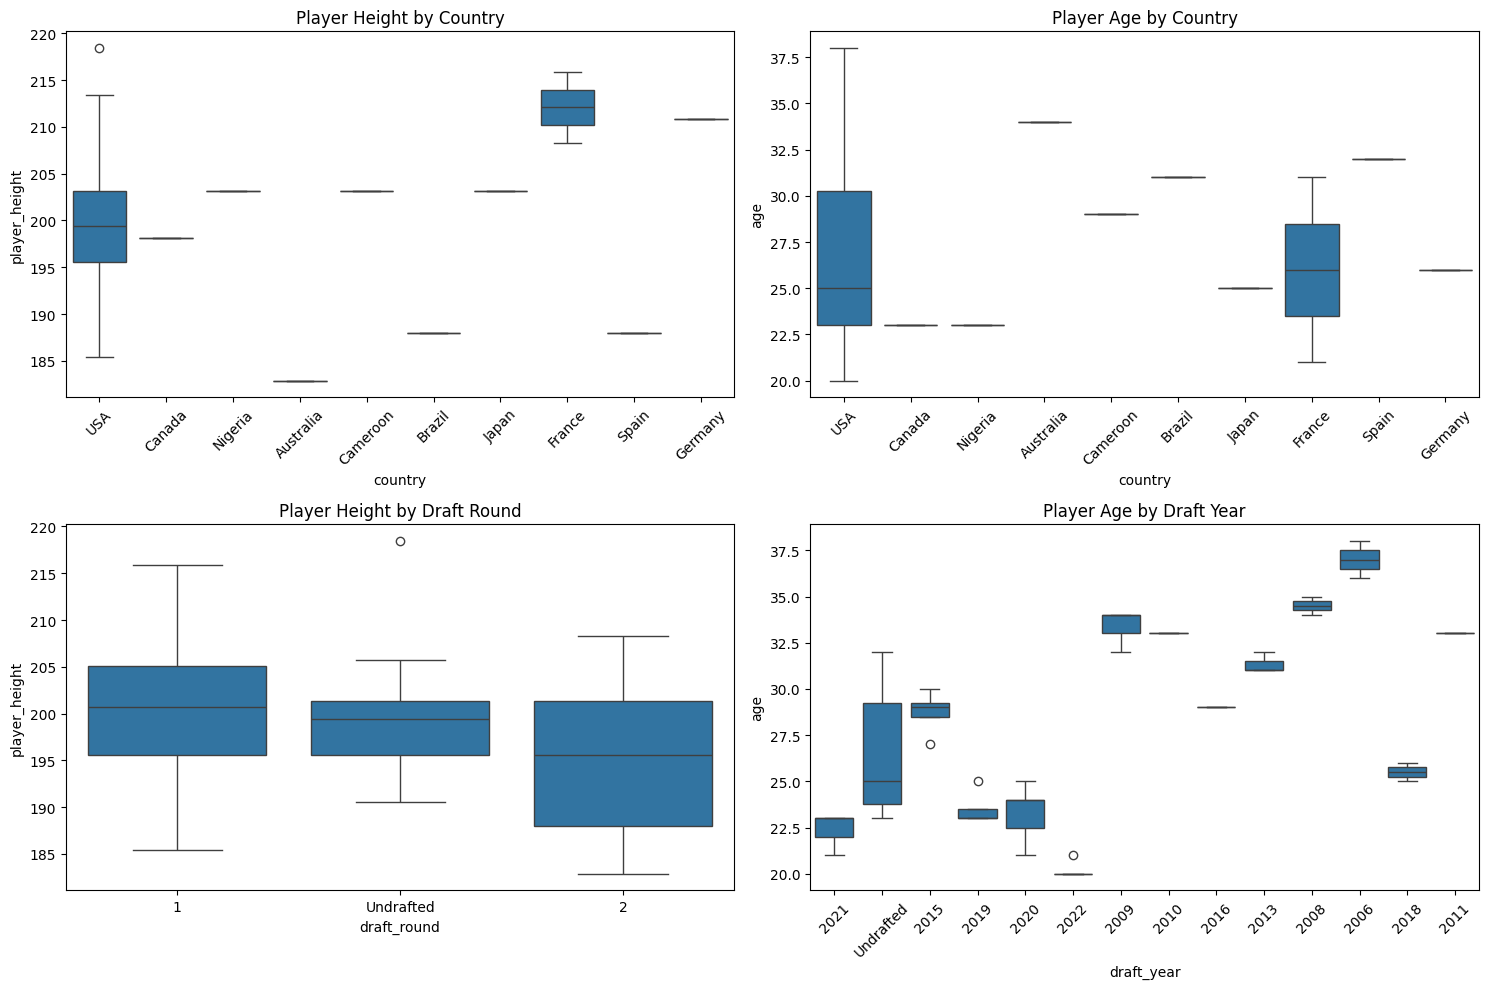

In [14]:
import seaborn as sns
# Selecting the first 50 rows from the original dataset for a more detailed visualization
top_50_data = season_2022_2023.head(50)

# Creating boxplots for player height and age across different categories

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Boxplot for player height by country
sns.boxplot(ax=axes[0, 0], x='country', y='player_height', data=top_50_data)
axes[0, 0].set_title('Player Height by Country')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)

# Boxplot for player age by country
sns.boxplot(ax=axes[0, 1], x='country', y='age', data=top_50_data)
axes[0, 1].set_title('Player Age by Country')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)

# Boxplot for player height by draft round
sns.boxplot(ax=axes[1, 0], x='draft_round', y='player_height', data=top_50_data)
axes[1, 0].set_title('Player Height by Draft Round')

# Boxplot for player age by draft year
sns.boxplot(ax=axes[1, 1], x='draft_year', y='age', data=top_50_data)
axes[1, 1].set_title('Player Age by Draft Year')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()
